# **FLOWER RECOGNITION**
[Kaggle](https://www.kaggle.com/code/suyashsunilraomorale/cnn-for-flower-recognition#Buliding-Model)

[Tensorflow official documents](https://www.tensorflow.org/tutorials/images/cnn)

# **Importing necessary libraries**

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import splitfolders

from IPython.display import Image, display
from keras import layers, models

#from keras_tuner import RandomSearch
#from keras_tuner.engine.hyperparameters import HyperParameters
import random
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

In [19]:
print(tf.__version__)

2.10.0


**displaying flower images from each class**

daisy


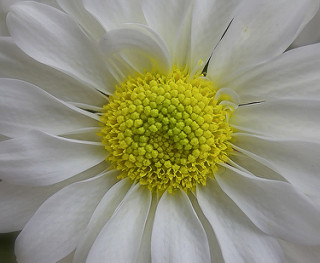

dandelion


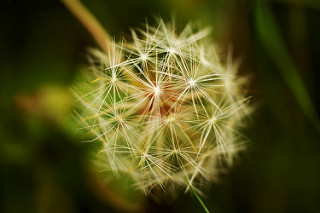

rose


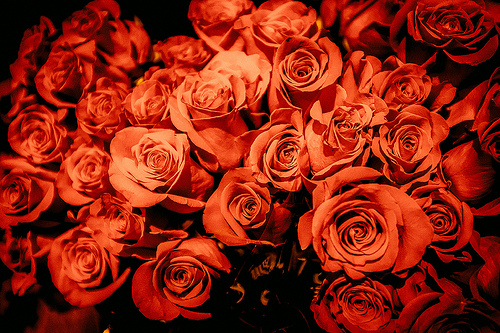

sunflower


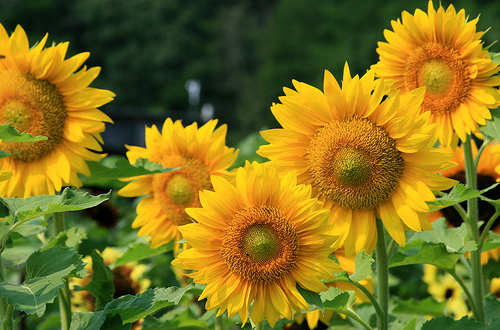

tulip


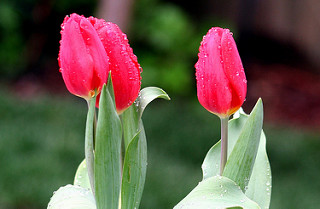

In [20]:
listOfImageNames = ['./datasets/daisy/100080576_f52e8ee070_n.jpg',
                    './datasets/dandelion/10043234166_e6dd915111_n.jpg',
                    './datasets/rose/10503217854_e66a804309.jpg',
                    './datasets/sunflower/1008566138_6927679c8a.jpg',
                    './datasets/tulip/100930342_92e8746431_n.jpg']
labels = ['daisy','dandelion','rose','sunflower','tulip']
for i,imageName in enumerate(listOfImageNames):
    print(labels[i])
    display(Image(filename=imageName))

# **creating a training and testing data**
Training: Validation: Testing = 7:2:1

#### Batch size vs epochs
1. Batch size: a number of samples processed before the model is updated
2. Epochs: the number times that the learning algorithm will work through the entire training dataset

- total images in train_data = 3942, batch size = 32, therefore total no. of batches formed are 3942/32 = 123.18
- total images in test_data = 1079, batch size = 32, therefore total no. of batches formed are 830/32 = 22.93

In [21]:
# Model config
batch_size = 32
epochs = 200

target_size = (64,64) # Image size of input

In [22]:
splitfolders.ratio('./datasets/', './split_datasets/', seed=1337, ratio=(0.7,0.2,0.1))

Copying files: 4317 files [00:02, 2006.97 files/s]


#### ImageDataGenerator
**Returns**
- A DirectoryIterator yielding tuples of (x, y) 
- where x is a numpy array containing a batch of images with shape (batch_size, *target_size, channels) 
- and y is a numpy array of corresponding labels.

In [23]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, # normalization
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    rotation_range = 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2
)

validate_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [24]:
train_data =  train_datagen.flow_from_directory(
        "./split_datasets/train",
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

validate_data = validate_datagen.flow_from_directory(
        "./split_datasets/val",
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

test_data =  test_datagen.flow_from_directory(
        "./split_datasets/test",
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

Found 3942 images belonging to 5 classes.
Found 1569 images belonging to 5 classes.
Found 830 images belonging to 5 classes.


# **Building Model**
1. Sequential way to build
2. Compile the model (loss funciton, optimizer, metrics)
3. Training process
4. Revise

In [25]:
# Buile CNN model
cnn = models.Sequential()

cnn.add(Conv2D (32, (3,3), activation='relu', input_shape=[64, 64, 3]))
cnn.add(MaxPool2D (pool_size=2, strides=2))

cnn.add(Conv2D (64, (3,3), activation='relu'))
cnn.add(MaxPool2D (pool_size=2, strides=2))

cnn.add(Conv2D (96, (3,3), activation='relu'))
cnn.add(MaxPool2D (pool_size=2, strides=2))

cnn.add(Dropout (0.1))
cnn.add(Flatten ())

cnn.add(Dense (units=128, activation='relu'))
cnn.add(Dense (units=5, activation='softmax'))

# plot the model's detail (layers, input & output shapes)
plot_model(cnn, to_file='./output/cnn_model.png', 
           show_shapes=True, show_layer_names=False, 
           rankdir='TB', # TB: vertical; LR: horizontal
           expand_nested=False, dpi=96)

# show the summary of the model
cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 96)        55392     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 96)        

## **Compile & train the model**

In [26]:
# compile the model
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# creating early stopping
es = EarlyStopping(monitor='val_loss', 
                   patience=6, mode='min')

# train the model
history = cnn.fit(train_data,
                verbose=1, validation_data= validate_data,
                batch_size= batch_size, epochs= epochs)

# save model
cnn.save('./output/cnn_model.h5')

Epoch 1/200


2023-03-24 19:58:22.841229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


124/124 [==============================] - ETA: 0s - loss: 1.3368 - accuracy: 0.3957

2023-03-24 19:58:33.341019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


124/124 [==============================] - 14s 108ms/step - loss: 1.3368 - accuracy: 0.3957 - val_loss: 1.1928 - val_accuracy: 0.4449
Epoch 2/200
124/124 [==============================] - 13s 107ms/step - loss: 1.1229 - accuracy: 0.5355 - val_loss: 1.0108 - val_accuracy: 0.5997
Epoch 3/200
124/124 [==============================] - 13s 102ms/step - loss: 1.0157 - accuracy: 0.5984 - val_loss: 0.9630 - val_accuracy: 0.6150
Epoch 4/200
124/124 [==============================] - 13s 103ms/step - loss: 0.9496 - accuracy: 0.6246 - val_loss: 0.9211 - val_accuracy: 0.6227
Epoch 5/200
124/124 [==============================] - 13s 106ms/step - loss: 0.9215 - accuracy: 0.6372 - val_loss: 0.9180 - val_accuracy: 0.6361
Epoch 6/200
124/124 [==============================] - 14s 116ms/step - loss: 0.8931 - accuracy: 0.6479 - val_loss: 0.9360 - val_accuracy: 0.6195
Epoch 7/200
124/124 [==============================] - 13s 107ms/step - loss: 0.8519 - accuracy: 0.6672 - val_loss: 0.8559 - val_accurac

# **Visualizing the performance**
1. Accuracy, Recall, Precision, F1-score
2. Confusion matrix
3. Prediction result (test data)
4. (Not in this case) ROC/AUC curve (only for binary classification)

#### Training log(accuracy vs loss)
- Accuracy = (TP + TN) / (TP + TN + FP + FN)
- Precision = TP / (TP + FP) 
- Recall = TP / (TP + FN)
- F1 = 2* Precision* Recall / (Precision + Recall)

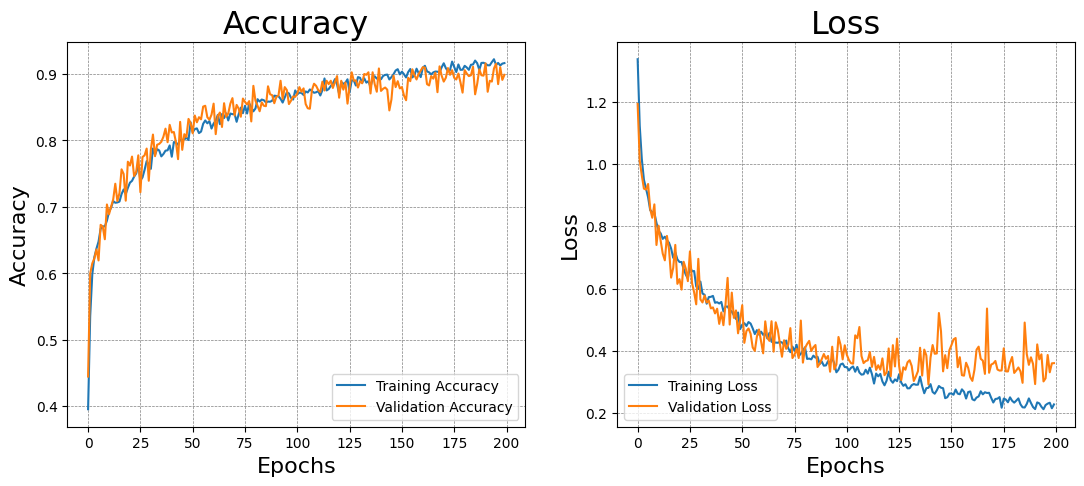

26/26 [==============================] - 2s 65ms/step - loss: 0.4302 - accuracy: 0.8928
Accuracy: 89.27711248397827


In [27]:
# set figure size (inches)
plt.figure(figsize=(13, 5))

# accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs',size='16'); plt.ylabel('Accuracy',size='16')
plt.legend(loc='lower right')
plt.title('Accuracy',size='23')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs',size='16'); plt.ylabel('Loss',size='16')
plt.legend(loc='lower left')
plt.title('Loss',size='23')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.savefig('./output/result_accuracy_loss.png')

plt.show()

# show accuray from the test_data
loss, accuracy= cnn.evaluate(test_data)
print(f'Accuracy: {accuracy*100}')

#### Evaluting the model on test data (Prediction result)


In [28]:
# Ground Truth of the testing data
test_labels, testdata = [],[]

for i in range(0,len(test_data)):
    test_labels.extend(np.array(test_data[i][1]))
    testdata.extend(np.array(test_data[i][0]))

test_lbls = []
for i in test_labels:
    if all(i == [0., 0., 0., 0., 1.]):
        test_lbls.append('tulip')
    elif all(i == [0., 0., 0., 1., 0.]):
        test_lbls.append('sunflower')
    elif all(i == [0., 0., 1., 0., 0.]):
        test_lbls.append('rose')
    elif all(i == [0., 1., 0., 0., 0.]):
        test_lbls.append('dendelion')
    elif all(i == [1., 0., 0., 0., 0.]):
        test_lbls.append('daisy')

In [29]:
# Predict via the CNN model trained above
pred = cnn.predict(test_data)
pred_digits = np.argmax(pred,axis=1)

# Transforming one-hot encoding labels into actual labels name
pred_lbls = []
for i in pred_digits:
    if (i == 4):
        pred_lbls.append('tulip')
    elif (i == 3):
        pred_lbls.append('sunflower')
    elif (i == 2):
        pred_lbls.append('rose')
    elif (i == 1):
        pred_lbls.append('dendelion')
    elif (i == 0):
        pred_lbls.append('daisy')


 3/26 [==>...........................] - ETA: 0s

2023-03-24 20:41:26.261228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 2s 57ms/step


prediciton result: (correct) 15 
prediciton result: (incorrect) 0


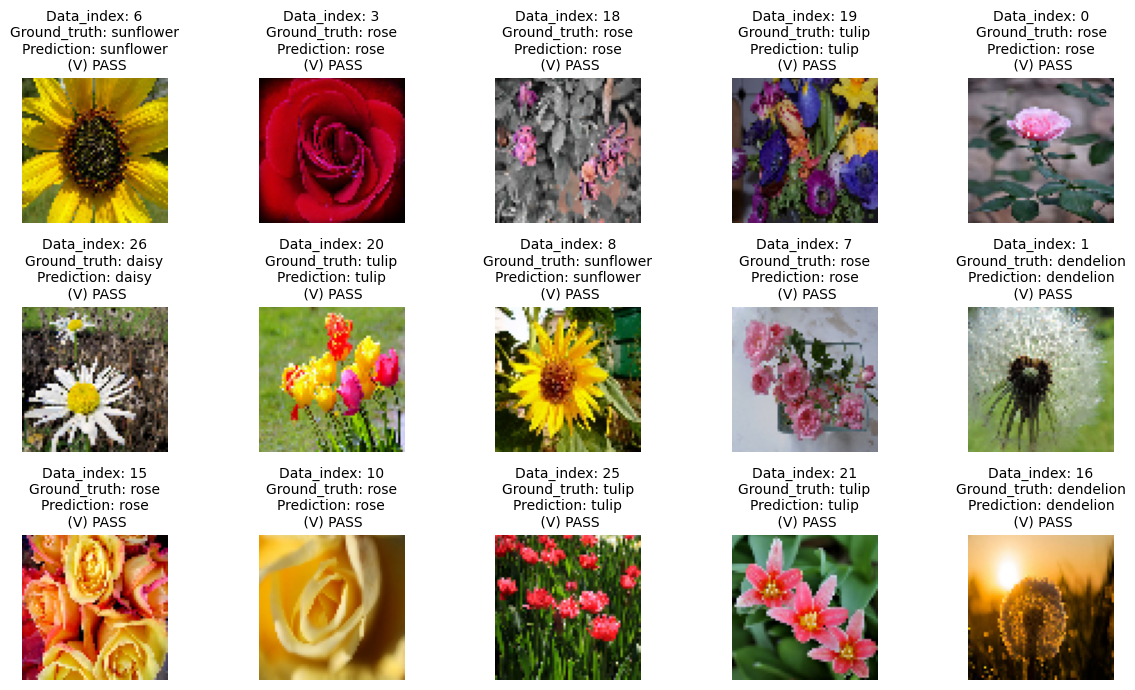

In [30]:
# Random pick 15 prediction result
fig,ax = plt.subplots(3,5)
fig.set_size_inches(12,7)

pick = random.sample(range(0,len(test_data)+1, 1), 15)
correct, wrong, xx = 0, 0, 0

for i in range(3):
    for j in range (5):    
        flag = '(V) PASS'

        # compare prediciton and the answer
        idx = pick[xx]
        ax[i,j].set_axis_off()
        ax[i,j].imshow(testdata[idx])
        
        if (test_lbls[idx] != pred_lbls[idx]):
            flag = '(X) Wrong'
            wrong += 1
        else:
            correct += 1

        ax[i,j].set_title('Data_index: '+str(idx) + 
                          '\nGround_truth: '+ test_lbls[idx]+ 
                          '\nPrediction: ' + pred_lbls[idx]+
                          '\n '+ flag, size='10')
        xx += 1

plt.tight_layout()
plt.savefig('./output/cnn_pred_result.png')

print(f"prediciton result: (correct) {correct} \nprediciton result: (incorrect) {wrong}")

#### Evaluate the performance of the model (Confusion matrix)

              precision    recall  f1-score   support

       daisy       0.96      0.87      0.91       147
   dendelion       0.89      0.92      0.90       200
        rose       0.85      0.87      0.86       151
   sunflower       0.85      0.92      0.89       140
       tulip       0.91      0.89      0.90       192

    accuracy                           0.89       830
   macro avg       0.89      0.89      0.89       830
weighted avg       0.89      0.89      0.89       830



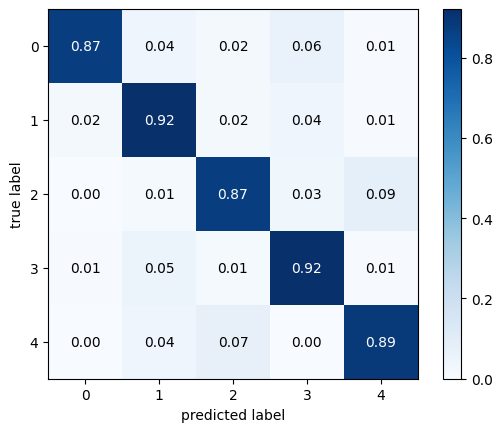

In [31]:
# Get confusion_matrix and classification from tensorflow
cm = confusion_matrix(test_lbls, pred_lbls)
report = classification_report(test_lbls, pred_lbls)
print(report)

# export classification_report.txt 
f = open("./output/classification_report.txt", "w")
f.write(report)
f.close()

# plot_confusion_matrix from mlxtend
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True)
plt.savefig('./output/confusion_matrix.png')
plt.show()
